# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import seaborn as sns
import numpy as np

import pandas as pd

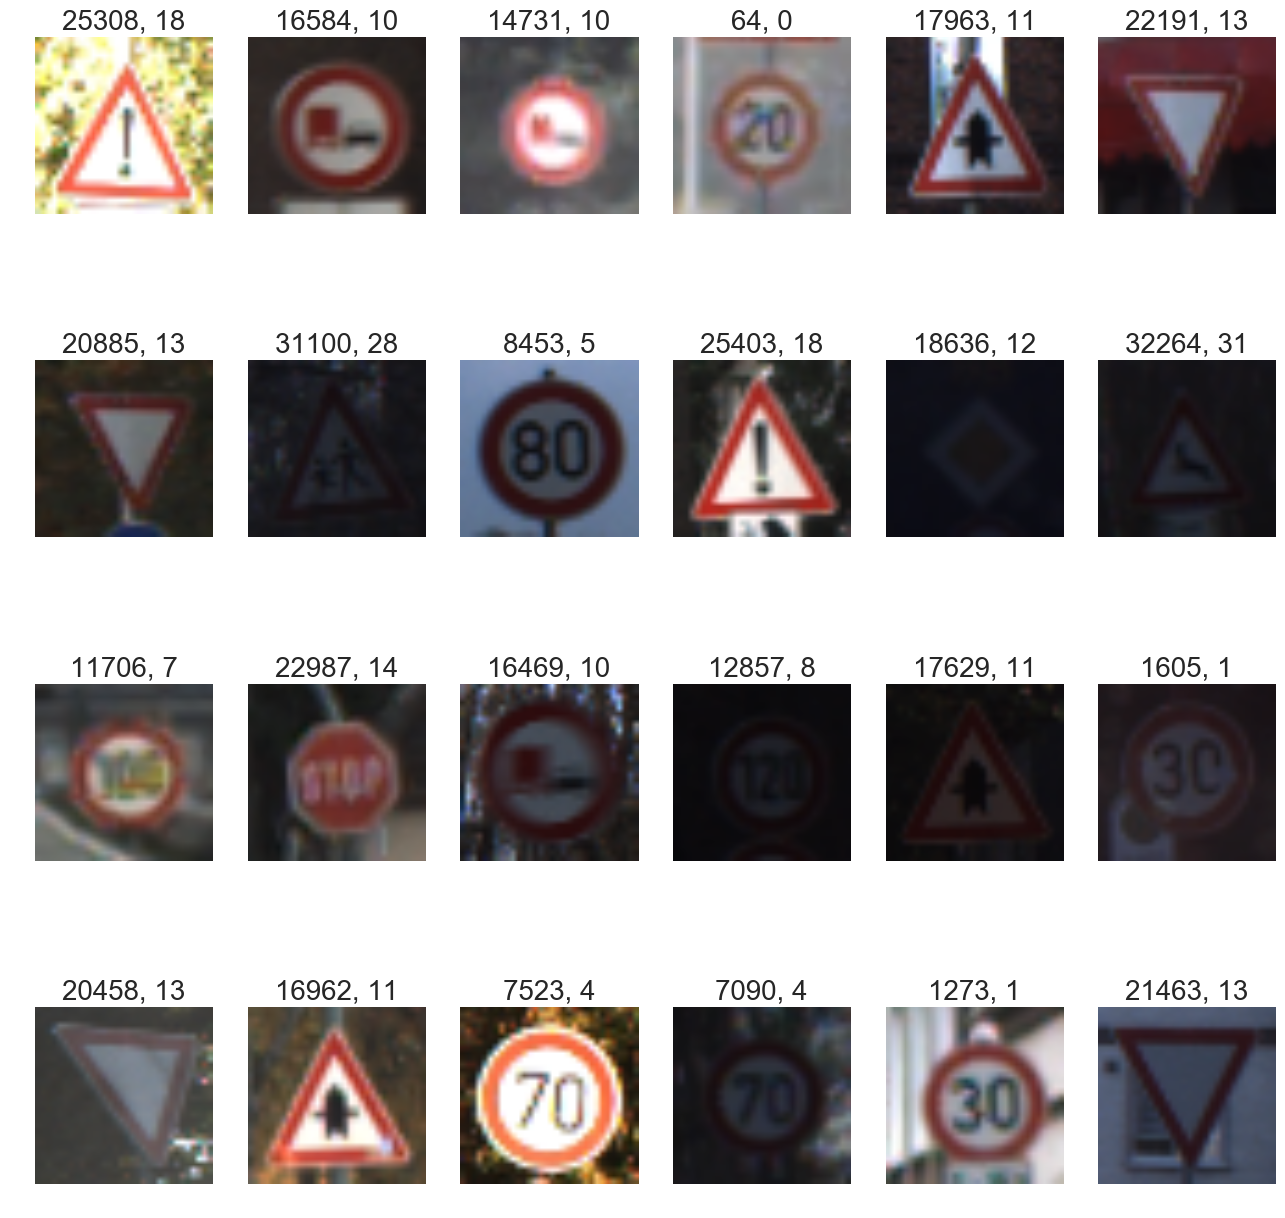

In [10]:
# plot some images, see what I am dealing
fig,axes = plt.subplots(nrows=4,ncols=6,figsize=(16,16))
#fig.subplots_adjust(hspace=0.0, wspace=.1)
for i in range(len(axes.flatten())):
    select = np.random.randint(n_train)
    axes.flatten()[i].imshow(X_train[select])
    axes.flatten()[i].set_title(str(select) + ', ' + str(y_train[select]), fontsize=20)
    axes.flatten()[i].axis('off')

In [12]:
signs = pd.read_csv('signnames.csv')
signs

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


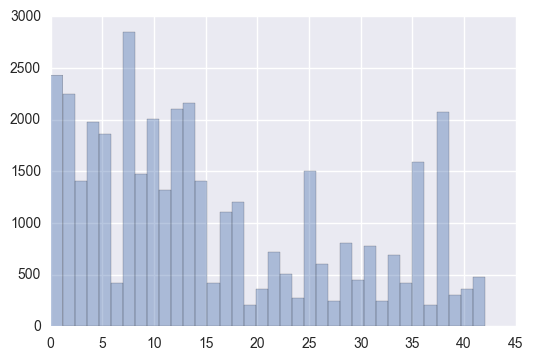

In [14]:
# Get a feeling on what kinds of sign contribute more.
sns.distplot(y_train,kde=False)

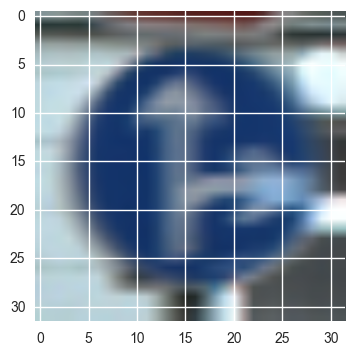

In [19]:
#Pick up one image and plot the distribution of each channel.
select = np.random.randint(n_train)
plt.imshow(X_train[select])

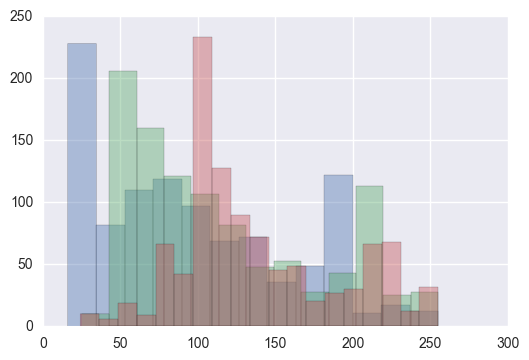

In [20]:
# I have intuition that I shoud use 3 color channel for my training model
# instead of single grey scale channel, but I want to understand 
# the distribution data of each color channel to support my decision.
sns.distplot(X_train[select,:,:,0].reshape(32*32),kde=False)
sns.distplot(X_train[select,:,:,1].reshape(32*32),kde=False)
sns.distplot(X_train[select,:,:,2].reshape(32*32),kde=False)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
* For my first run, I decide to do the shuffle only.
* Normalization seems not necessary at first glance, since the feature inputs are evenly between 0 and 255. This can wait later.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [6]:
print('Number of training data: {}'.format(len(X_train)))
print('Number of validation data: {}'.format(len(X_validation)))
print('Number of training label: {}'.format(len(y_train)))
print('Number of validation label: {}'.format(len(y_validation)))

Number of training data: 31367
Number of validation data: 7842
Number of training label: 31367
Number of validation label: 7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
* I split 20% of the training data for my validation data as this is a pratical move in ML.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [32]:
EPOCHS = 80
BATCH_SIZE = 100

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

rate = 0.0009

In [38]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # 32x32x3 -> 28x28x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    conv1 = tf.nn.relu(conv1)

    # 28x28x6 -> 14x14x6
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # 14x14x6 -> 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)

    # 10x10x16 -> 5x5x16
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # 5x5x16 -> 400
    fc0   = flatten(conv2)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # 400 -> 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    fc1    = tf.nn.relu(fc1)

    # 120 -> 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    fc2    = tf.nn.relu(fc2)
    
    # 84 -> 43
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I use LeNet as my starting point to the problem and change during my try and error steps later on, so it has the following structure:
1. Convolutional layer: 32x32x3 -> 28x28x6
2. ReLU activation
3. Avg pooling layer: 28x28x6 -> 14x14x6
4. Convolutional layer: 14x14x6 -> 10x10x16
5. ReLU activation
6. Avg pooling layer: 10x10x16 -> 5x5x16
7. Flatten: 5x5x16 -> 400
8. Dropout
9. Fully connected layer: 400 -> 120
10. Fully connected layer: 120 -> 84
11. Fully connected layer: 84 -> 43

In [39]:
### Train your model here.

# Training pipeling
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Evaluation method
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    validation_accuracy = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy.append(evaluate(X_validation, y_validation))
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.574

EPOCH 2 ...
Validation Accuracy = 0.786

EPOCH 3 ...
Validation Accuracy = 0.875

EPOCH 4 ...
Validation Accuracy = 0.911

EPOCH 5 ...
Validation Accuracy = 0.927

EPOCH 6 ...
Validation Accuracy = 0.945

EPOCH 7 ...
Validation Accuracy = 0.951

EPOCH 8 ...
Validation Accuracy = 0.962

EPOCH 9 ...
Validation Accuracy = 0.967

EPOCH 10 ...
Validation Accuracy = 0.973

EPOCH 11 ...
Validation Accuracy = 0.968

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.976

EPOCH 14 ...
Validation Accuracy = 0.973

EPOCH 15 ...
Validation Accuracy = 0.979

EPOCH 16 ...
Validation Accuracy = 0.982

EPOCH 17 ...
Validation Accuracy = 0.985

EPOCH 18 ...
Validation Accuracy = 0.983

EPOCH 19 ...
Validation Accuracy = 0.983

EPOCH 20 ...
Validation Accuracy = 0.985

EPOCH 21 ...
Validation Accuracy = 0.985

EPOCH 22 ...
Validation Accuracy = 0.988

EPOCH 23 ...
Validation Accuracy = 0.988

EPOCH 24 ...
Validation Accura

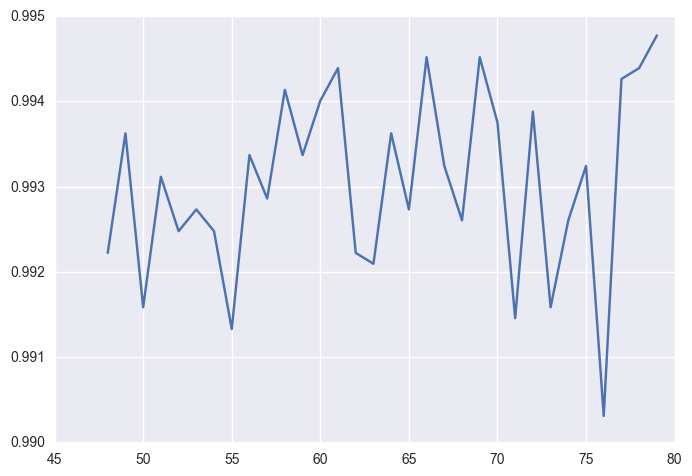

In [40]:
#The line plot and box plot are used to see the improvemnet visually.
start_idx = EPOCHS * 6 // 10
plt.plot(list(range(EPOCHS))[start_idx::],validation_accuracy[start_idx::])

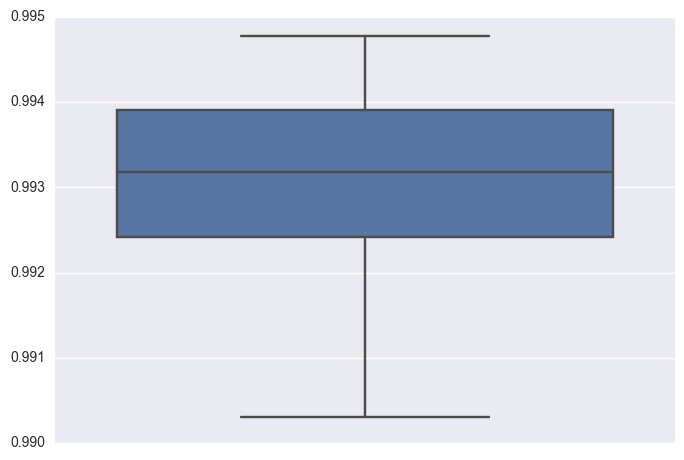

In [41]:
sns.boxplot(y=validation_accuracy[start_idx::])

In [42]:
# Evaluate on my test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.958


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* optimizer: AdmOptimizer
* batch size: 100
* epochs: 80
* learning rate: 0.0009
* mu: 0
* sigma: 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I start by using LeNet and do a series of try and error steps. There are also git logs in the repoistory.

* Original LeNet, increase epochs to 100, reach 98% accruacy.
* Try out some hyperprameter combinations but not seeing progress apparently.
* Start to reorganize LeNet architecture, change max_pooling to avg_pooling, reach 99.1% accuracy.
* Introduce dropout to the architecture, the accuracy is not improving, but the fluctuation is better.
* Move dropout layer before fully connected layer. I think there are more nodes for dropping there and it works, 99.5% accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

traffic-sign-general-caution.jpg
traffic-sign-speed-limit70.jpg
traffic-sign-stop.jpg
traffic-sign-wild.jpg
traffic-sign-working-road.jpg
traffic-sign-yield.jpg


(6, 32, 32, 3)

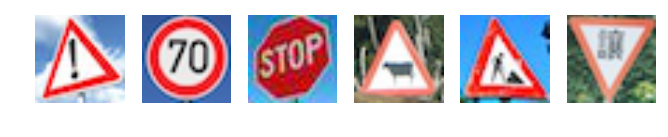

In [122]:
### Load the images and plot them here.

import glob
import cv2

fig, axs = plt.subplots(nrows=1,ncols=6)

test_images = []
for i, img in enumerate(glob.glob("*.jpg")):
    print(img)
    image = cv2.imread(img)
    axs[i].axis('off')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i].imshow(image)
    test_images.append(image)
    
test_images = np.asarray(test_images)
test_labels = [18,4,14,31,25,13]
test_images.shape

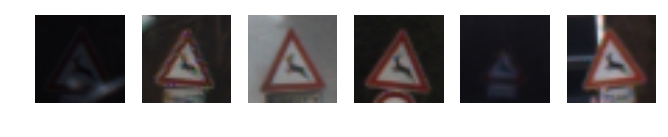

In [131]:
def plot_image_by_label(target, image_set, label_set):
    find_idx = [idx for idx,label in enumerate(label_set) if label == target]

    fig, axs = plt.subplots(nrows=1,ncols=6)
    for i in range(6):
        axs[i].imshow(image_set[find_idx[i]])
        axs[i].axis('off')
        
plot_image_by_label(31, X_validation, y_validation)

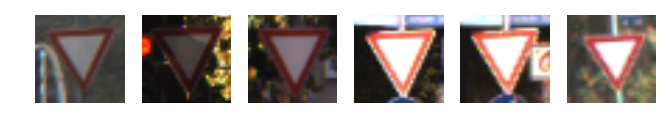

In [129]:
plot_image_by_label(13, X_validation, y_validation)

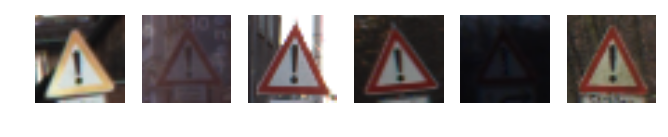

In [132]:
plot_image_by_label(18, X_validation, y_validation)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I choose some images with known sign symbol but in different aspects of angle. This can test my model's capability, although I did not do data argumentation like image rotation. For the animal crossing sign, I choose one with a cow symbol inside the red triangle to see if the model can recognize this. And I choose a yield sign from my local area, which contains a 'yield' word in traditional Chinese.

In [135]:
### Run the predictions here.
def evaluate2(X_data, y_data):
    sess = tf.get_default_session()
    pred = sess.run(correct_prediction, feed_dict={x: X_data, y: y_data, keep_prob: 1.0})
    print(pred)

# Evaluate on my test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    evaluate2(test_images, test_labels)

[ True  True  True False  True False]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Well, there are two mispredictions in my test set, the accuracy is apparently low. I plot images in question from my validation set. It looks like my model does not recognize a cow symbol as an animal crossing sign but a deer will do. Neigther does it recognize an inverted triangle with 'yield' word inside, which is common in any local area, as yield sign properly. Question 8 might help me showing the fact numerically.

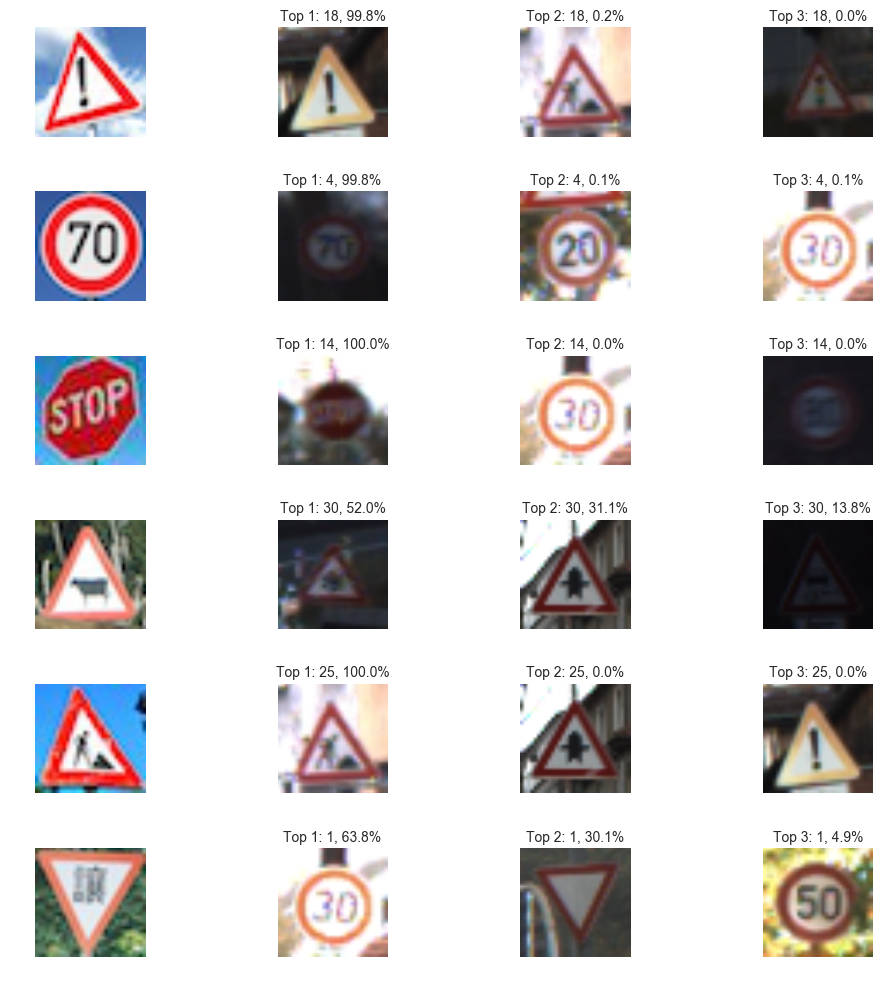

In [155]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmax_logits_on_test = sess.run(softmax_logits, feed_dict={x: test_images, keep_prob: 1.0})
    top_k_on_test = sess.run(top_k, feed_dict={x: test_images, keep_prob: 1.0})
    
    fig, axs = plt.subplots(len(test_images),4,figsize=(12,12))
    fig.subplots_adjust(hspace=0.5)
    
    for i in range(len(test_images)):
        axs[i][0].imshow(test_images[i])
        axs[i][0].axis('off')
        
        label_1 = top_k_on_test[1][i][0]
        axs[i][1].imshow(X_validation[list(y_validation).index(label_1)])
        axs[i][1].axis('off')
        axs[i][1].set_title('Top 1: {}, {:.1f}%'.format(label_1, 100 * top_k_on_test[0][i][0]), fontsize=10)
        
        label_2 = top_k_on_test[1][i][1]
        axs[i][2].imshow(X_validation[list(y_validation).index(label_2)])
        axs[i][2].axis('off')
        axs[i][2].set_title('Top 2: {}, {:.1f}%'.format(label_1, 100 * top_k_on_test[0][i][1]), fontsize=10)
        
        label_3 = top_k_on_test[1][i][2]
        axs[i][3].imshow(X_validation[list(y_validation).index(label_3)])
        axs[i][3].axis('off')
        axs[i][3].set_title('Top 3: {}, {:.1f}%'.format(label_1, 100 * top_k_on_test[0][i][2]), fontsize=10)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

For right predictions, the model is certain about its decisions, although there are differences in angle. For the animal crossing sign, the tested sign is misunderstood as the ice/snow sign. I think my model did not see or learn the kind of sign before so it made a wrong prediction. For the yielding sign, the top guess is wrong but it made a right guess in the second one. I think the model is misled by the symbol inside the triangle. For both cases, the performance should be better after the model is taught to recognize these symbols.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.